# Retail Data Analysis

### Project Overview

This is a data analysis project for a retail company. The goal of this project is to analyze transaction statistics across the retail chain, extract valuable insights and answer key business questions.

### Data Description

The analysis will be based on three datasets: `customers.csv`, `purchases.csv`, and `shops.csv`.

- `customers.csv`: Contains information about each customer registered in the loyalty program.

- `purchases.csv`: A purchase log containing information for all customers, both registered and unregistered in the loyalty program. For registered customers, the corresponding customer ID is known. Each purchase entry represents the total price of the transaction, even if multiple items were purchased.

- `shops.csv`: Provides information about the shops and the special offers they've organized. Note that a single shop can organize multiple offers, resulting in multiple rows corresponding to the same shop. Some shops do not organize special offers at all, but they are still included in this dataset.

### Importing Required Libraries

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, pearsonr

### Data Loading & Initial Exploration

Let's load the `customers.csv`, `purchases.csv`, and `shops.csv` datasets into Pandas DataFrames.

In [275]:
customers = pd.read_csv('customers.csv')
purchases = pd.read_csv('purchases.csv')
shops = pd.read_csv('shops.csv')

Let's examine the `customer_id` and `age` variables in more detail.

In [276]:
purchases['customer_id'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: customer_id, dtype: float64

While the `customer_id` column is represented as a float, it's essential to recognize that it functions as a categorical variable. Customer IDs are unique identifiers assigned to each customer and are not inherently numerical.

In [277]:
customers['age'].head()

0    71.0
1    21.0
2    36.0
3    38.0
4    51.0
Name: age, dtype: float64

The `age` column, on the other hand, represents a numerical variable. Age is a measurable quantity and can be used for mathematical calculations and comparisons.

Now, let's determine whether the `total_price` column can be considered an i.i.d. sample.

In [278]:
purchases.head()

,customer_id,date,shop_id,total_price
0,0.0,2018-05-04,40,289.673291
1,0.0,2019-01-26,40,1316.898901
2,0.0,2018-11-18,42,159.414367
3,0.0,2018-05-12,42,808.791649
4,0.0,2019-04-20,42,1207.855038


The assumption of i.i.d. for the `total_price` column is violated due to the following reasons:

- `customer_id`: The data shows multiple purchases by the same customers. This introduces dependence, as a customer's purchase history can influence their future purchases.

- `date`: The purchases span different dates, suggesting potential seasonality or temporal trends that could affect the distribution of `total_price`.

- `shop_id`: Different shops might have different pricing strategies or serve different customer segments, leading to variations in average purchase amounts.

### Data Visualization & Further Exploration

Let's visualize the distribution of the `age` variable from the `customers` dataset to better understand the age demographics of the customers.

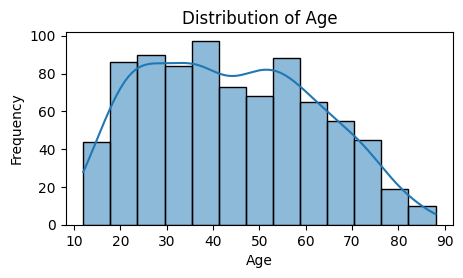

In [279]:
# Plot the distribution of the 'age' variable
plt.figure(figsize=(5, 2.5))
sns.histplot(customers['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

To determine the optimal threshold age such that the number of customers below this age is as close as possible to the number of customers above it, we can use the median of the age variable. The median is the value that separates the higher half from the lower half of the data, making it an ideal threshold for our purpose.

In [280]:
# Calculate the median age
threshold_age = customers['age'].median()
print(f'Threshold age: {threshold_age:.0f}')

Threshold age: 43


Let's analyze how purchases are distributed throughout the year, focusing on identifying trends such as increased retail activity in December due to Christmas. We will extract the month from the date variable in the `purchases` dataframe, create a new column for the month, and visualize its distribution.

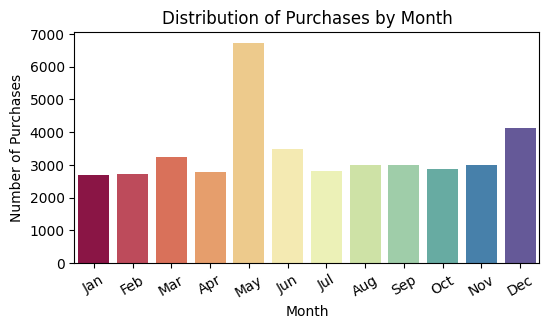

In [281]:
# Convert the 'date' column to datetime
purchases['date'] = pd.to_datetime(purchases['date'])

# Extract the year from the 'date' column
purchases['year'] = purchases['date'].dt.year

# Extract the month from the 'date' column
purchases['month'] = purchases['date'].dt.month

# Create a list to define the correct order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the distribution of purchases by month
plt.figure(figsize=(6, 3))
sns.countplot(x='month', data=purchases, palette='Spectral', hue='month', legend=False)
plt.title('Distribution of Purchases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(ticks=range(12), labels=month_order, rotation=30)
plt.show()

To investigate the high number of purchases in May, let's plot the distribution of offers by month. This will help us understand if there are any special offers or promotions that could have influenced the number of purchases in May.

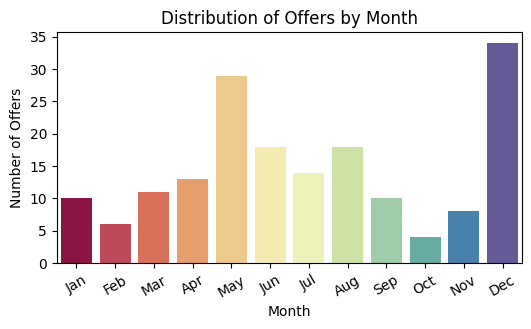

In [282]:
# Convert the 'offer_start_date' column to datetime
shops['offer_start_date'] = pd.to_datetime(shops['offer_start_date'])

# Convert the 'offer_end_date' column to datetime
shops['offer_end_date'] = pd.to_datetime(shops['offer_end_date'])

# Extract the month from the 'offer_start_date' column
shops['offer_start_month'] = shops['offer_start_date'].dt.month

# Plot the distribution of offers by month
plt.figure(figsize=(6, 3))
sns.countplot(x='offer_start_month', data=shops, palette='Spectral', hue='offer_start_month', legend=False)
plt.title('Distribution of Offers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Offers')
plt.xticks(ticks=range(12), labels=month_order, rotation=30)
plt.show()

As we can see from the plot, the number of offers in May is significantly higher than in other months, except December. So, this could be the reason for the high number of purchases in May.

Now let's try to find out why there are so many offers in May. We need to ensure that our analysis considers the same time frame for each month. To do this, we need to understand what years are included in the data and what months are present in each year.

In [283]:
# Identify the unique years in the dataset
unique_years = purchases['year'].unique()

# Create a dictionary to store unique months for each year
unique_months_per_year = {}

# Loop over the unique years
for year in unique_years:
    # Get the unique months for the current year
    unique_months = purchases[purchases['year'] == year]['month'].unique()

    # Sort the months numerically
    unique_months.sort()

    # Convert numeric months to month names
    month_names = [month_order[m-1] for m in unique_months]
    
    # Store the month names in the dictionary
    unique_months_per_year[year] = month_names

# Print the unique months for each year
for year, months in unique_months_per_year.items():
    print(f"Year {year}: {', '.join(months)}")

Year 2018: May, Jun, Jul, Aug, Sep, Oct, Nov, Dec
Year 2019: Jan, Feb, Mar, Apr, May, Jun


The data includes purchases from May of both 2018 and 2019, but only from December of 2018. This means that there are two instances of May and only one instance of December in the data. Therefore, the total number of purchases in May could be higher than in December simply because there are more data points for May.

We observe that people tend to shop more frequently in December. However, do they spend more per visit during this month? To investigate, let's create a bar plot illustrating the average total purchase price for each month of the year.

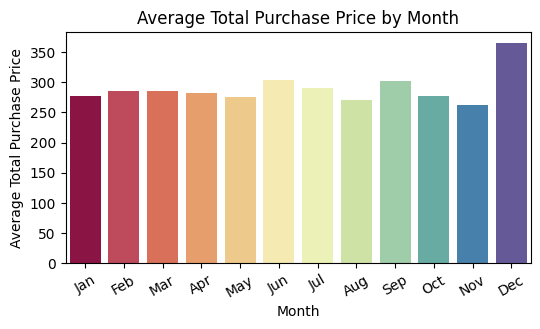

In [284]:
# Calculate the average total purchase price for each month
monthly_avg_price = purchases.groupby('month')['total_price'].mean().reset_index()

# Plot the average total purchase price for each month
plt.figure(figsize=(6, 3))
sns.barplot(x='month', y='total_price', data=monthly_avg_price, palette='Spectral', hue='month', legend=False)
plt.title('Average Total Purchase Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Total Purchase Price')
plt.xticks(ticks=range(12), labels=month_order, rotation=30)
plt.show()

### Hypothesis Testing

To determine if the higher average purchase price in December is truly significant or just due to random chance, we need to perform a statistical test. We can use a paired t-test with a two-sided alternative. This test is suitable because we are comparing the means of two related groups (average purchase prices in the same shops for two different months). For example, we can compare the average purchase prices in December and November for the same shops.

In [285]:
# Calculate the average purchase price for each month in each shop
pivot_table = purchases.pivot_table(values='total_price', index='shop_id', columns='month', aggfunc='mean')

# Extract average purchase prices for December and November
december_prices = pivot_table[12].dropna()
november_prices = pivot_table[11].dropna()

# Perform a paired t-test
t_stat, p_value = ttest_rel(december_prices, november_prices, alternative='two-sided')
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 12.130046456676514
p-value: 2.8875117936923646e-19


The p-value is significantly less than 0.05, which means that we can reject the null hypothesis that the average purchase prices in December and November are equal. Therefore, the difference in average purchase prices between December and November is statistically significant.

Let's also visualize the relationship between cutomer's age and their spending per purchase to see if there is any correlation between the two.

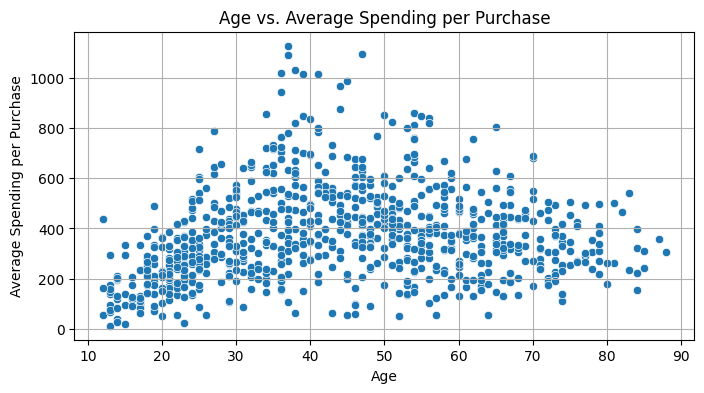

In [286]:
# Perform an inner join between the 'purchases' and 'customers' dataframes on the 'customer_id' column
customer_purchases = pd.merge(purchases, customers, on='customer_id', how='inner')

# Group by 'customer_id' to calculate the average 'total_price' for each customer retaining their age
avg_spending_per_customer = customer_purchases.groupby('customer_id').agg({'total_price': 'mean', 'age': 'first'})

# Creat a scatter plot to visualize the relationship between age and average spending per purchase
plt.figure(figsize=(8, 4))
sns.scatterplot(x='age', y='total_price', data=avg_spending_per_customer)
plt.title('Age vs. Average Spending per Purchase')
plt.xlabel('Age')
plt.ylabel('Average Spending per Purchase')
plt.grid(True)
plt.show()

Now, let's calculate Pearson's correlation coefficient and perform a statistical test to determine if there is a significant correlation between customer's age and their spending. Our null and alternative hypotheses are as follows:

- **H₀**: $\rho = 0$ (there is no correlation between customers' age and their average spending per purchase)

- **H₁**: $\rho \ne 0$ (there is a correlation between customers' age and their average spending per purchase)

In [287]:
# Drop missing values to ensure a clean dataset for our analysis
avg_spending_per_customer = avg_spending_per_customer.dropna()

# Calculate the Pearson's correlation coefficient and the p-value
correlation, p_value = pearsonr(avg_spending_per_customer['age'], avg_spending_per_customer['total_price'])
print(f"correlation: {correlation:.3f}")
print(f"p-value: {p_value:.6f}")

correlation: 0.165
p-value: 0.000002


- The Pearson's correlation coefficient is 0.165 $\implies$ there's a weak positive correlation between customers' age and their average spending per purchase.

- The p-value is 0.000002, which is less than the 5% significance level $\implies$ we can reject the null hypothesis and conclude that age does have a statistically significant effect on average spending per purchase in our dataset.

### Promotion Analysis

In order to understand how special offers affect customer behavior, we first need to identify which purchases were made during special offers. For each purchase, we know `date` and `shop_id`, and for each shop, we have the dates of all special offers. By comparing each purchase date with the offer dates for the corresponding shop, we can determine which purchases were influenced by special offers. This requires joining the `customer_purchases` dataframe with the `shops` dataframe.


In [288]:
# Merge 'customer_purchases' with 'shops' on 'shop_id'
purchases_with_offers = pd.merge(customer_purchases, shops, on='shop_id', how='left')

Let's investigate the `purchases_with_offers` dataset. Each row corresponds to a purchase, but for shops with multiple special offers, there are multiple rows. During the join, each purchase is linked to all relevant offer rows, causing duplicates and confusion about which rows correspond to each purchase. This happens because `customer_purchases` lacks a purchase identifier. To fix this, we need to add an identifier by resetting the index of `customer_purchases`. This creates a new column with unique identifiers for each purchase, clarifying the data.

In [289]:
# Reset index to add a unique identifier for each purchase
customer_purchases = customer_purchases.reset_index()

# Perform the join again with the reset index
purchases_with_offers = pd.merge(customer_purchases, shops, on='shop_id', how='left')

Now we need to determine whether each purchase occurred during a special offer. This involves comparing the purchase date with the offer start and end dates.

In [290]:
# Add a column to check if the purchase happened during the offer period
purchases_with_offers['offer'] = (purchases_with_offers['date'] >= purchases_with_offers['offer_start_date']) & \
                                 (purchases_with_offers['date'] <= purchases_with_offers['offer_end_date'])


Now we have a table that indicates whether each purchase happened during a special offer. Next, we need a new table showing if any relevant special offer coincided with a particular purchase. This requires grouping and aggregating our data. We'll group by the `index` column, which contains the purchase identifier, and use the aggregation function `any` on the offer column. The `any` function returns `True` if any element in the group is `True`, otherwise it returns `False`. For the other purchase-related columns, which are duplicated within each group, we'll keep the first value using the `first` aggregation function. This can be achieved by passing a dictionary to the `.agg` method.

In [291]:
aggregated_purchases_with_offers = purchases_with_offers.groupby("index").agg({
        "customer_id": "first",
        "date": "first",
        "shop_id": "first",
        "total_price": "first",
        "month": "first",
        "age": "first",
        "offer": "any",
})

Finally, let's try to answer whether people tend to spend more money when they make a purchase during a special offer.

- First, we need to filter out all purchases made in December to remove the holiday effect from our analysis.

- Next, we’ll construct a customer spending table. This table will contain two columns: one column will display the average price of purchases made during special offers, and the other will show the same for purchases made outside of special offers.

- After that, we can apply a paired t-test to determine if there is a statistically significant difference between these two columns. We’ll use a two-sided alternative for this test. Our null and alternative hypotheses are as follows:

    - **H₀**: Special offers do not have a significant impact on customer spending.

    - **H₁**: Special offers do have a significant impact on customer spending.



In [292]:
# Remove purchases made in December
non_december_purchases = purchases_with_offers[purchases_with_offers['month'] != 12]

# Create customer spending table
customer_spending = non_december_purchases.groupby(['customer_id', 'offer']).agg({'total_price': 'mean'}).unstack()

# Rename the columns for clarity
customer_spending.columns = ['avg_price_no_offer', 'avg_price_offer']

# Drop rows with NaN values
customer_spending = customer_spending.dropna()

# Perform a paired t-test
t_stat, p_value = ttest_rel(customer_spending['avg_price_offer'], customer_spending['avg_price_no_offer'], alternative='two-sided')
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 16.243652956704274
p-value: 6.436813726273595e-51


The p-value is extremely small, much less than 0.05, which means that we can reject the null hypothesis and conclude that there is a statistically significant difference in customer spending during special offers compared to periods without special offers. This suggests that special offers do have a significant impact on customer spending.